In [2]:
import pandas as pd
import seaborn as sns
from datetime import datetime
from matplotlib import pyplot as plt
from scipy import stats
pd.options.mode.chained_assignment = None

In [3]:
bikes = pd.read_csv('/Users/liewfuteck/Downloads/london_merged.csv')
bikes.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


# Data preprocessing

In [4]:
bikes['temp_actual'] = bikes['t1']
bikes['temp_feels'] = bikes['t2']
bikes = bikes.drop(columns = ['t1', 't2'])

In [5]:
# Doing exploratory data analysis, we see that the count of bikes is grouped by the hour.
# Furthermore, based on the information provided about dataset, we can create a few columns based on the weather and the season.

season_dict = {'0.0': 'spring',
               '1.0': 'summer',
               '2.0': 'fall',
               '3.0': 'winter'}

bikes.season = bikes.season.astype('str')
bikes.season = bikes.season.map(season_dict)

In [6]:
bikes

,timestamp,cnt,hum,wind_speed,weather_code,is_holiday,is_weekend,season,temp_actual,temp_feels
0,2015-01-04 00:00:00,182,93.0,6.0,3.0,0.0,1.0,winter,3.0,2.0
1,2015-01-04 01:00:00,138,93.0,5.0,1.0,0.0,1.0,winter,3.0,2.5
2,2015-01-04 02:00:00,134,96.5,0.0,1.0,0.0,1.0,winter,2.5,2.5
3,2015-01-04 03:00:00,72,100.0,0.0,1.0,0.0,1.0,winter,2.0,2.0
4,2015-01-04 04:00:00,47,93.0,6.5,1.0,0.0,1.0,winter,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,81.0,19.0,3.0,0.0,0.0,winter,5.0,1.0
17410,2017-01-03 20:00:00,541,81.0,21.0,4.0,0.0,0.0,winter,5.0,1.0
17411,2017-01-03 21:00:00,337,78.5,24.0,4.0,0.0,0.0,winter,5.5,1.5
17412,2017-01-03 22:00:00,224,76.0,23.0,4.0,0.0,0.0,winter,5.5,1.5


In [7]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   hum           17414 non-null  float64
 3   wind_speed    17414 non-null  float64
 4   weather_code  17414 non-null  float64
 5   is_holiday    17414 non-null  float64
 6   is_weekend    17414 non-null  float64
 7   season        17414 non-null  object 
 8   temp_actual   17414 non-null  float64
 9   temp_feels    17414 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 1.3+ MB


In [8]:
# .T to transpose the metrics
bikes.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
weather_code,17414.0,2.722752,2.341163,1.0,1.0,2.0,3.00,26.0
is_holiday,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
is_weekend,17414.0,0.285403,0.451619,0.0,0.0,0.0,1.00,1.0
temp_actual,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
temp_feels,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0


# Treating Outliers

In [9]:
bikes['weather_code'].value_counts(ascending = False)

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

In [10]:
# Since there are very few entries with weather_code = 26 (snowfall) and weather_code = 10 (rain with thunderstorm),
# we will go ahead and remove them for this analysis.

bikes = bikes[(bikes['weather_code'] != 26) & (bikes['weather_code'] != 10)]
bikes['weather_code'].value_counts()

1.0    6150
2.0    4034
3.0    3551
7.0    2141
4.0    1464
Name: weather_code, dtype: int64

In [11]:
# Furthermore, we can also remove data points with outliers of weather
Q3 = bikes['temp_actual'].quantile(0.75)
Q1 = bikes['temp_actual'].quantile(0.25)
IQR = Q3-Q1
upper = Q3+(1.5*IQR)
lower = Q1-(1.5*IQR)

In [12]:
bikes = bikes[(bikes['temp_actual'] <= upper) & (bikes['temp_actual'] >= lower)]
bikes.describe().T

# We see that the max temp_actual has decreased from 34 degree C to 28 degree C, with mean still roughly constant at 12.4 degree C.

,count,mean,std,min,25%,50%,75%,max
cnt,17276.0,1140.481304,1080.077017,0.0,260.0,844.0,1661.0,7860.0
hum,17276.0,72.390672,14.174416,23.0,63.0,74.5,83.0,100.0
wind_speed,17276.0,15.901139,7.894228,0.0,10.0,15.0,20.5,56.5
weather_code,17276.0,2.642336,1.892800,1.0,1.0,2.0,3.0,7.0
is_holiday,17276.0,0.022169,0.147239,0.0,0.0,0.0,0.0,1.0
is_weekend,17276.0,0.285656,0.451740,0.0,0.0,0.0,1.0,1.0
temp_actual,17276.0,12.425639,5.462298,-1.5,8.0,12.5,16.0,28.0
temp_feels,17276.0,11.482915,6.513172,-6.0,6.0,12.5,16.0,29.0


# Ridership during holidays

In [13]:
# We want to analyse to see which holiday has the most number of bike sharers

bikes_holiday = bikes[bikes['is_holiday'] != 0.0]
bikes_holiday['date'] = pd.to_datetime(bikes_holiday['timestamp']).dt.date
bike_holiday_stats = bikes_holiday['cnt'].groupby(bikes_holiday['date']).sum()
# bike_holiday_stats = pd.DataFrame(bike_holiday_stats)
# bike_holiday_stats_2 = bikes_holiday['temp_actual'].groupby(bikes_holiday['date']).mean()
# bike_holiday_stats_2 = pd.DataFrame(bike_holiday_stats_2)
# bike_holiday_stats_merged = bike_holiday_stats.merge(bike_holiday_stats_2, on = 'date')
bike_holiday_stats = pd.DataFrame(bike_holiday_stats)
bike_holiday_stats.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,16.0,18461.9375,8263.360789,9639.0,11103.75,16580.0,25286.75,34176.0


In [14]:
bike_holiday_stats.sort_values(by = 'cnt', ascending = False)

,cnt
date,
2016-08-29,34176
2015-05-25,29502
2015-05-04,26795
2015-04-06,25439
2016-03-25,25236
2016-05-30,23697
2015-12-25,22423
2016-05-02,19428
2015-12-28,13732


In [15]:
bikes_non_holiday = bikes[bikes['is_holiday'] == 0.0]
bikes_non_holiday['date'] = pd.to_datetime(bikes_non_holiday['timestamp']).dt.date
bike_non_holiday_stats = bikes_non_holiday['cnt'].groupby(bikes_non_holiday['date']).sum()
bike_non_holiday_stats = pd.DataFrame(bike_non_holiday_stats)
bike_non_holiday_stats.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,714.0,27181.462185,8375.726046,4869.0,21963.25,26927.0,33288.0,72504.0


In [16]:
bike_non_holiday_stats.sort_values(by = 'cnt', ascending = False)

,cnt
date,
2015-07-09,72504
2015-08-06,63468
2016-07-30,45608
2016-05-08,44758
2016-07-31,44678
...,...
2016-03-27,8123
2016-12-24,7890
2016-01-02,7195


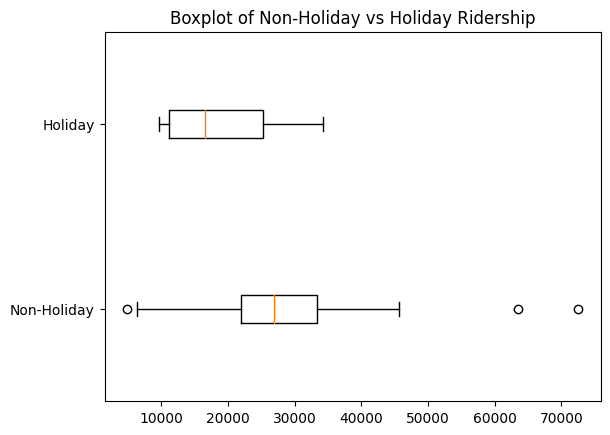

In [17]:
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot of Non-Holiday vs Holiday Ridership')
ax1.boxplot([bike_non_holiday_stats['cnt'], bike_holiday_stats['cnt']], vert = False)
ax1.set_yticklabels(['Non-Holiday', 'Holiday'])
plt.show()

# Analysis by Weather

In [18]:
# We hypothesize that most riders will choose to go out when the weather is not too cold, and the ridership tends to decrease
# with lower temperatures.

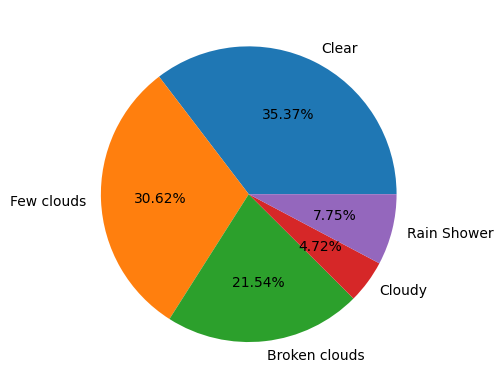

In [19]:
weather_value_count = bikes[['cnt', 'weather_code']]
weather_labels = ['Clear', 'Few clouds', 'Broken clouds', 'Cloudy', 'Rain Shower']
weather_value_count = weather_value_count.groupby(weather_value_count['weather_code']).sum()
plt.pie(weather_value_count['cnt'], labels = weather_labels, autopct = '%1.2f%%')
plt.show()

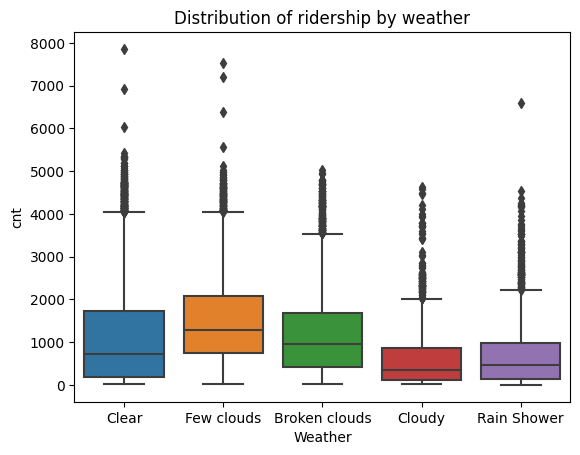

In [20]:
weather_value_count = bikes[['cnt', 'weather_code']]
ax = sns.boxplot(y = weather_value_count['cnt'], x = weather_value_count['weather_code'])
ax.set_xticklabels(weather_labels)
ax.set_title('Distribution of ridership by weather')
ax.set_xlabel('Weather')
plt.show()

In [21]:
# We see that riders choose to ride the bikes mainly when the weather is clear, or if there are few clouds. 
# Ridership drops once there are broken clouds, and drops again drastically once the weather is cloudy.

# Analysis by Season

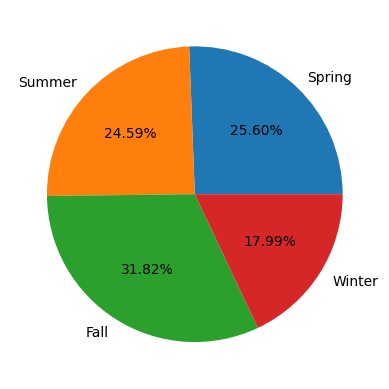

In [22]:
season_value_count = bikes[['cnt', 'season']]
season_labels = ['Spring', 'Summer', 'Fall', 'Winter']
season_value_count = season_value_count.groupby(season_value_count['season']).sum()
plt.pie(season_value_count['cnt'], labels = season_labels, autopct = '%1.2f%%')
plt.show()

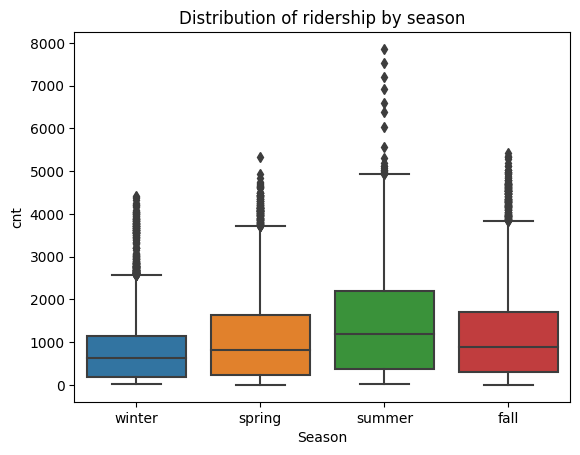

In [23]:
season_value_count = bikes[['cnt', 'season']]
ax = sns.boxplot(y = season_value_count['cnt'], x = season_value_count['season'])
ax.set_title('Distribution of ridership by season')
ax.set_xlabel('Season')
plt.show()

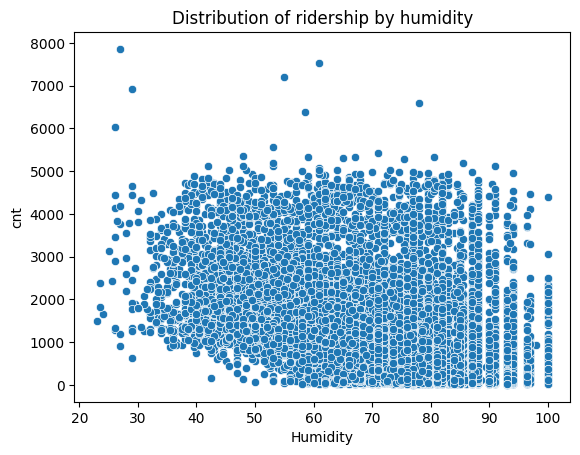

In [24]:
ax = sns.scatterplot(x = bikes['hum'], y = bikes['cnt'])
ax.set_title('Distribution of ridership by humidity')
ax.set_xlabel('Humidity')
plt.show()

In [25]:
# There does not seem to be much of a correlation between humidity and ridership (equally scattered)

# Analysis of booking by months of year

In [26]:
bikes['month'] = pd.to_datetime(bikes['timestamp']).dt.month
bikes_month = bikes[['cnt', 'month']]
bikes_month_count = bikes_month.groupby(bikes_month['month']).sum()
bikes_month_count = bikes_month_count.sort_values('month')
bikes_month_count['month'] = bikes_month_count.index

month_dict = {'1': 'Jan',
               '2': 'Feb',
               '3': 'Mar',
               '4': 'Apr',
             '5': 'May',
             '6': 'Jun',
             '7': 'Jul',
             '8': 'Aug',
             '9': 'Sep',
             '10': 'Oct',
             '11': 'Nov',
             '12': 'Dec'}

bikes_month_count.month = bikes_month_count.month.astype('str')
bikes_month_count.month = bikes_month_count.month.map(month_dict)

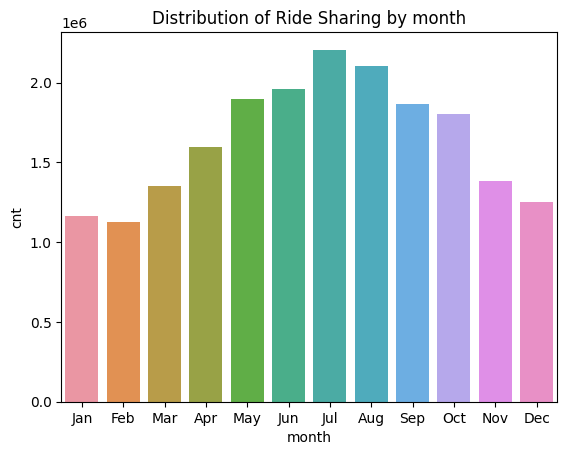

In [27]:
ax = sns.barplot(x = "month", y = "cnt", data = bikes_month_count)
ax.set_title('Distribution of Ride Sharing by month')
plt.show()

In [28]:
# From the bar plot above, we see that the ride sharing is most active during the middle half of the year. This
# is likely due to the better weather encouraging people to come out for activities.

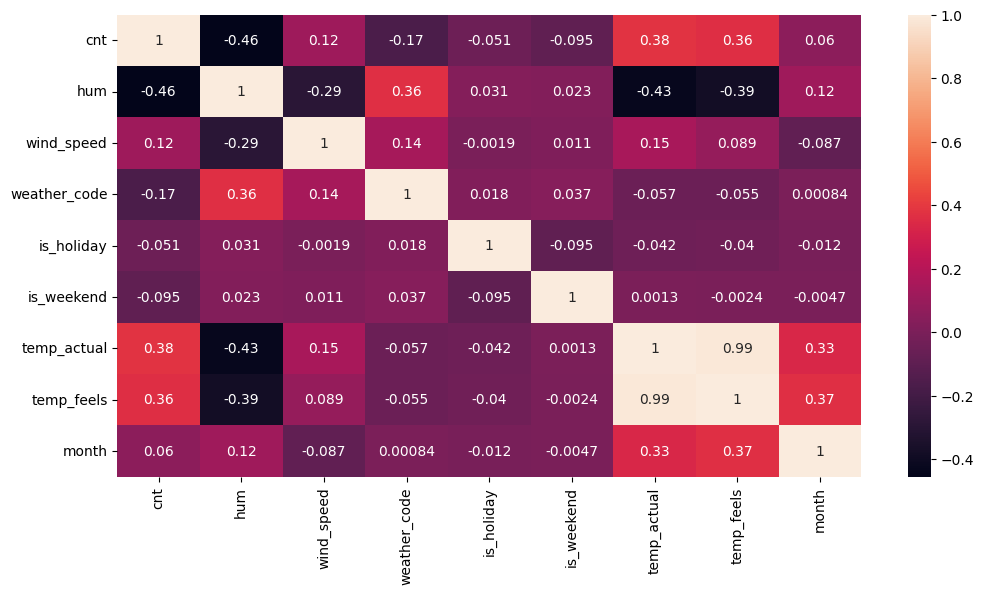

In [29]:
plt.figure(figsize = (12,6))
sns.heatmap(bikes.corr(), annot = True)
plt.show()

# Hypothesis Testing

In [30]:
# To test some of the claims made above in a scientific manner, we conduct hypothesis testing.
# The claims which we will test are as follows:
#     1. Does holiday vs non-holiday affect ridership?
#     2. Does weather affecting ridership?
#     3. Does season affecting ridership?
    
def hypo_test(p_value):
    sig_level = 0.05
    if p_value < sig_level:
        print(f"p-value = {p_value}.\nSince p-value is lower than significance level, we reject null hypothesis in favour of alternative hypothesis.")
    else:
        print(f"p-value = {p_value}.\nSince p-value is higher than significance level, we cannot reject null hypothesis.")

## Holiday on ridership

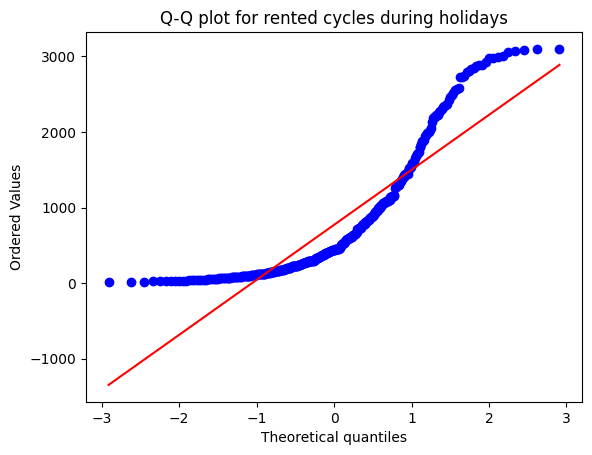

In [31]:
# For holiday affecting ridership,
# Null hypothesis: There is no effect of holiday on rented cycles.
# Alternative hypothesis: There is an effect of holiday on rented cycles.
    
# We first conduct a normality check.    
    
stats.probplot(bikes_holiday['cnt'], plot = plt, dist = 'norm')
plt.title('Q-Q plot for rented cycles during holidays')
plt.show()

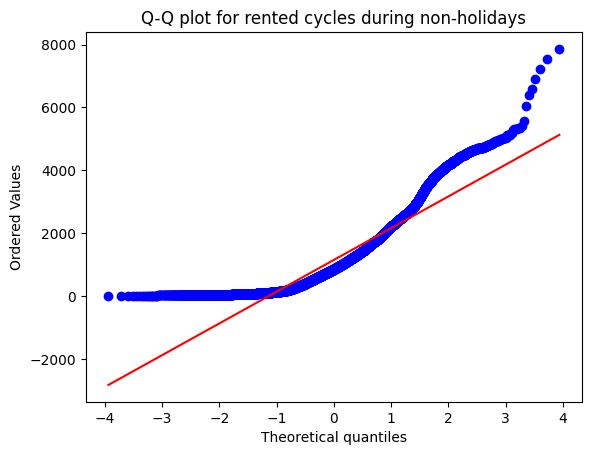

In [32]:
stats.probplot(bikes_non_holiday['cnt'], plot = plt, dist = 'norm')
plt.title('Q-Q plot for rented cycles during non-holidays')
plt.show()

In [33]:
# Since the normality assumption is fulfilled, we go ahead and do a 2-sample t-test.
t_test = stats.ttest_ind(bikes_holiday['cnt'], bikes_non_holiday['cnt'])
hypo_test(t_test.pvalue)

p-value = 1.2899137224101067e-11.
Since p-value is lower than significance level, we reject null hypothesis in favour of alternative hypothesis.


## Weather on ridership

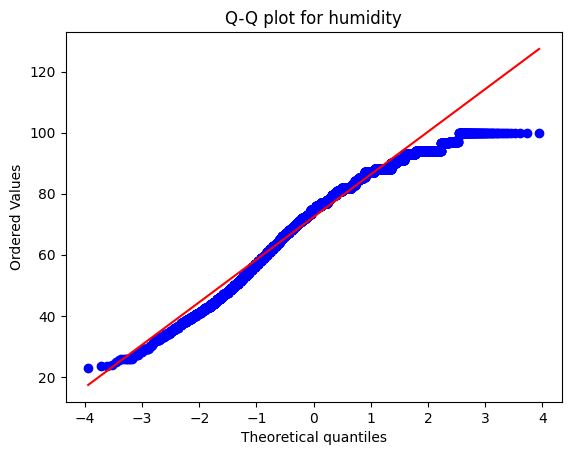

In [34]:
# For weather affecting ridership,
# Null hypothesis: There is no effect of weather on rented cycles.
# Alternative hypothesis: There is an effect of weather on rented cycles.
    
# We first conduct a normality check on each group.

stats.probplot(bikes['hum'], plot = plt, dist = 'norm')
plt.title('Q-Q plot for humidity')
plt.show()

In [35]:
weather_value_count = bikes[['cnt', 'weather_code']]
weather_value_count

,cnt,weather_code
0,182,3.0
1,138,1.0
2,134,1.0
3,72,1.0
4,47,1.0
...,...,...
17409,1042,3.0
17410,541,4.0
17411,337,4.0
17412,224,4.0


In [36]:
weather_grp_1 = bikes[['cnt']][bikes['weather_code'] == 1.0]
weather_grp_2 = bikes[['cnt']][bikes['weather_code'] == 2.0]
weather_grp_3 = bikes[['cnt']][bikes['weather_code'] == 3.0]
weather_grp_4 = bikes[['cnt']][bikes['weather_code'] == 4.0]
weather_grp_5 = bikes[['cnt']][bikes['weather_code'] == 7.0]

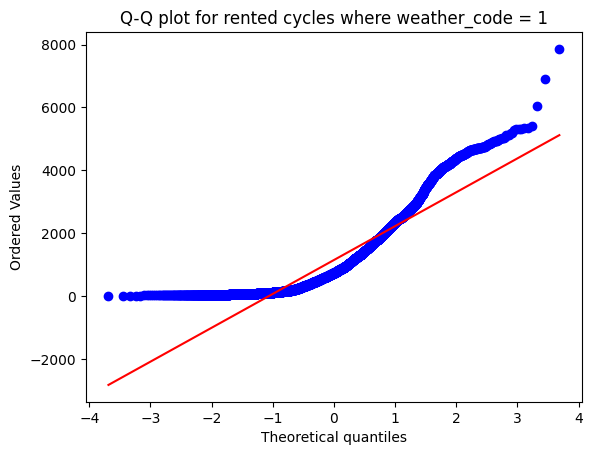

In [37]:
stats.probplot(weather_grp_1['cnt'], plot = plt, dist = 'norm')
plt.title("Q-Q plot for rented cycles where weather_code = 1")
plt.show()

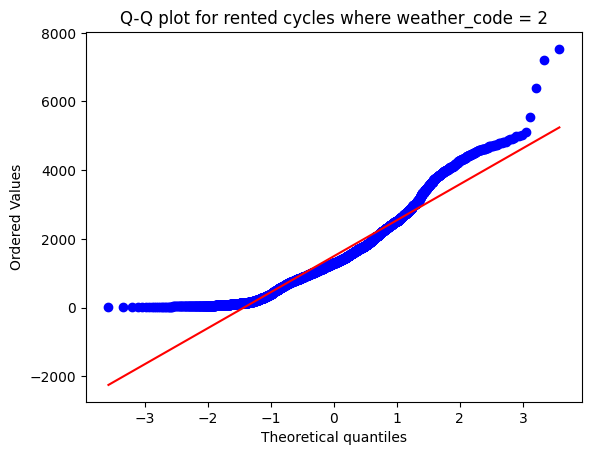

In [38]:
stats.probplot(weather_grp_2['cnt'], plot = plt, dist = 'norm')
plt.title("Q-Q plot for rented cycles where weather_code = 2")
plt.show()

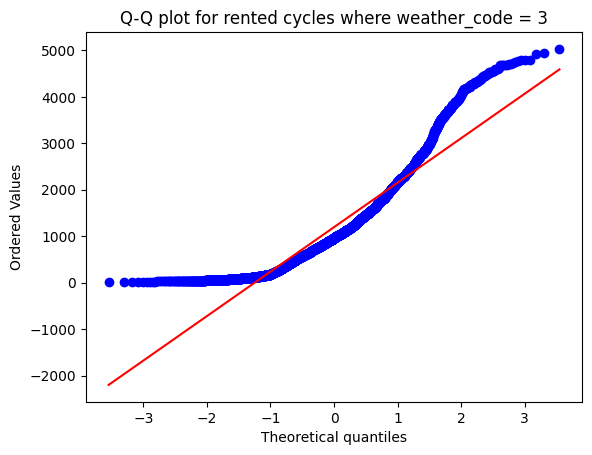

In [39]:
stats.probplot(weather_grp_3['cnt'], plot = plt, dist = 'norm')
plt.title("Q-Q plot for rented cycles where weather_code = 3")
plt.show()

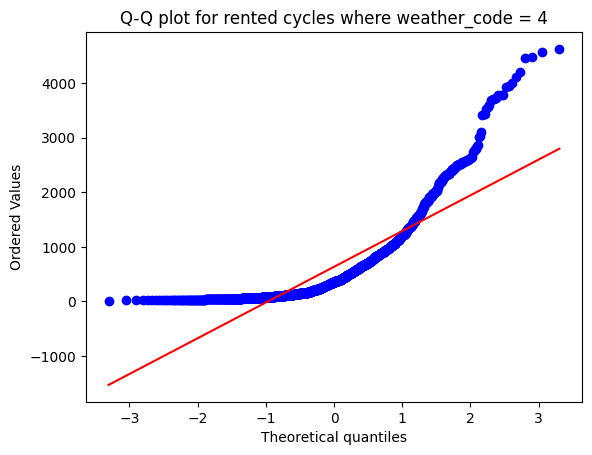

In [40]:
stats.probplot(weather_grp_4['cnt'], plot = plt, dist = 'norm')
plt.title("Q-Q plot for rented cycles where weather_code = 4")
plt.show()

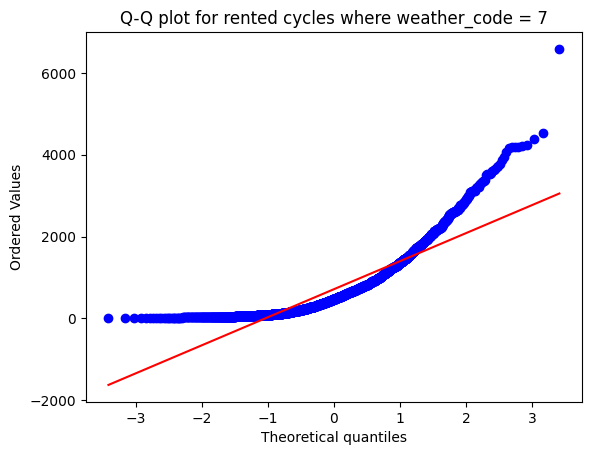

In [41]:
stats.probplot(weather_grp_5['cnt'], plot = plt, dist = 'norm')
plt.title("Q-Q plot for rented cycles where weather_code = 7")
plt.show()

In [42]:
anova_test = stats.f_oneway(weather_grp_1,
                            weather_grp_2,
                            weather_grp_3,
                            weather_grp_4,
                            weather_grp_5)
hypo_test(anova_test[1])

p-value = [3.15606166e-245].
Since p-value is lower than significance level, we reject null hypothesis in favour of alternative hypothesis.


## Season on ridership

In [43]:
season_grp_1 = bikes[['cnt']][bikes['season'] == 'spring']
season_grp_2 = bikes[['cnt']][bikes['season'] == 'summer']
season_grp_3 = bikes[['cnt']][bikes['season'] == 'fall']
season_grp_4 = bikes[['cnt']][bikes['season'] == 'winter']

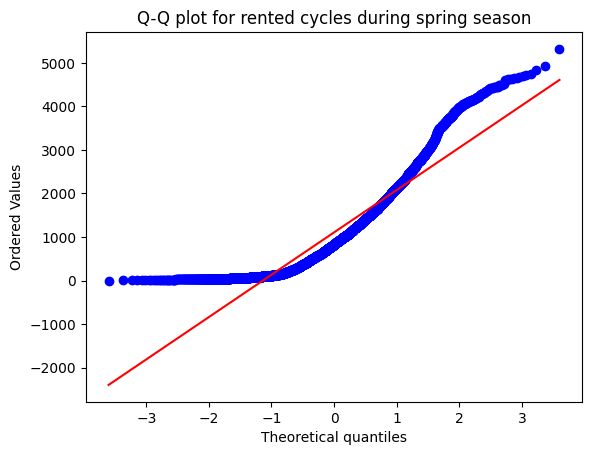

In [44]:
stats.probplot(season_grp_1['cnt'], plot = plt, dist = 'norm')
plt.title("Q-Q plot for rented cycles during spring season")
plt.show()

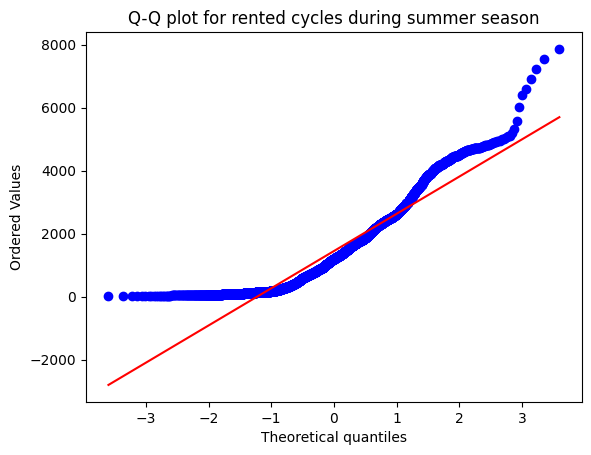

In [45]:
stats.probplot(season_grp_2['cnt'], plot = plt, dist = 'norm')
plt.title("Q-Q plot for rented cycles during summer season")
plt.show()

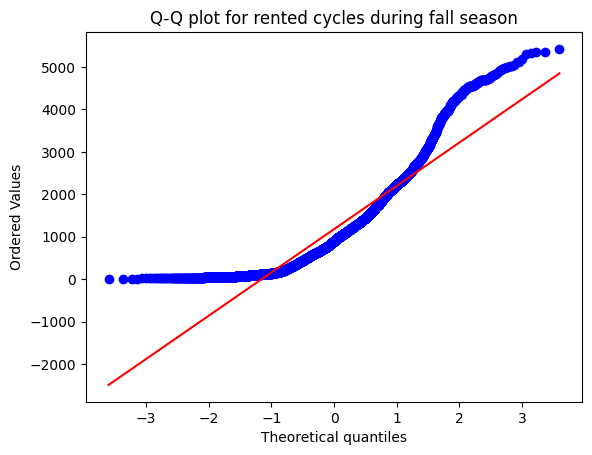

In [46]:
stats.probplot(season_grp_3['cnt'], plot = plt, dist = 'norm')
plt.title("Q-Q plot for rented cycles during fall season")
plt.show()

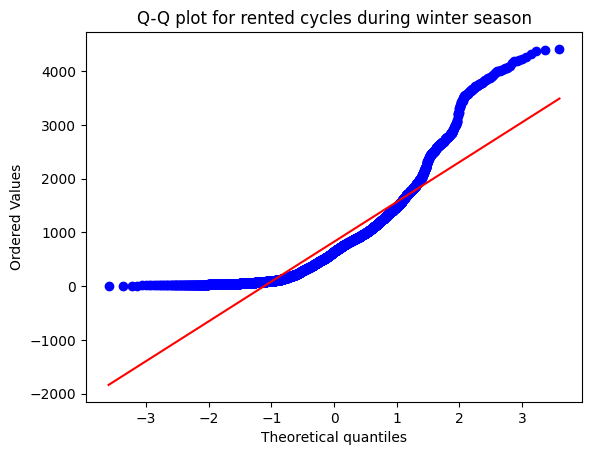

In [47]:
stats.probplot(season_grp_4['cnt'], plot = plt, dist = 'norm')
plt.title("Q-Q plot for rented cycles during winter season")
plt.show()

In [48]:
anova_test = stats.f_oneway(season_grp_1,
                            season_grp_2,
                            season_grp_3,
                            season_grp_4)
hypo_test(anova_test[1])

p-value = [1.24537556e-159].
Since p-value is lower than significance level, we reject null hypothesis in favour of alternative hypothesis.
